In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [11]:
df = pd.read_csv('Train.csv')
df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [12]:
df.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [13]:
df['travel_with'].fillna(value = 0, inplace=True)
df['total_male'].fillna(value = df['total_male'].mean(), inplace=True)
df['total_female'].fillna(value = df['total_female'].mean(), inplace=True)
df['most_impressing'].fillna(value = df['most_impressing'].mode(), inplace=True)

In [14]:
df.isnull().sum()

ID                         0
country                    0
age_group                  0
travel_with                0
total_female               0
total_male                 0
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          313
total_cost                 0
dtype: int64

In [15]:
df['country'].nunique()

105

In [30]:
## we have tourist from 105 countries that has visited Tansania##

In [16]:
df.groupby('country')['ID'].count()

country
ALGERIA                       2
ANGOLA                        1
ARGENTINA                     1
AUSTRALIA                   186
AUSTRIA                      18
                           ... 
UNITED STATES OF AMERICA    695
URUGUAY                       1
YEMEN                         2
ZAMBIA                      191
ZIMBABWE                    274
Name: ID, Length: 105, dtype: int64

In [19]:
df.groupby('age_group')['ID'].count()

age_group
1-24      624
25-44    2487
45-64    1391
65+       307
Name: ID, dtype: int64

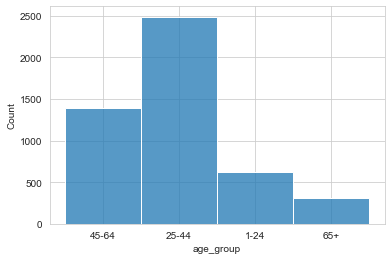

In [13]:
sns.histplot(x = 'age_group', data = df)
plt.show()

In [ ]:
#it shows age group of 25-44 tourists travel more to Tanzania 

In [21]:
cost = df.groupby('age_group')['total_cost'].sum()
cost.idxmax()

'45-64'

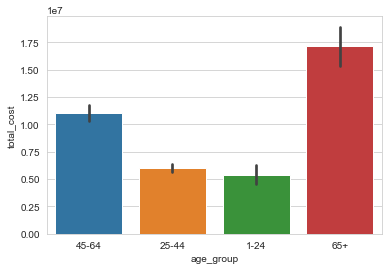

In [15]:
sns.barplot(x = 'age_group', y = 'total_cost', data = df)
plt.show()

In [ ]:
# it can be deduced from the data that tourist with the age of 65 and above spent more in tourism

In [16]:
purp = df.groupby('purpose')['total_cost'].sum()
purp.idxmax()

'Leisure and Holidays'

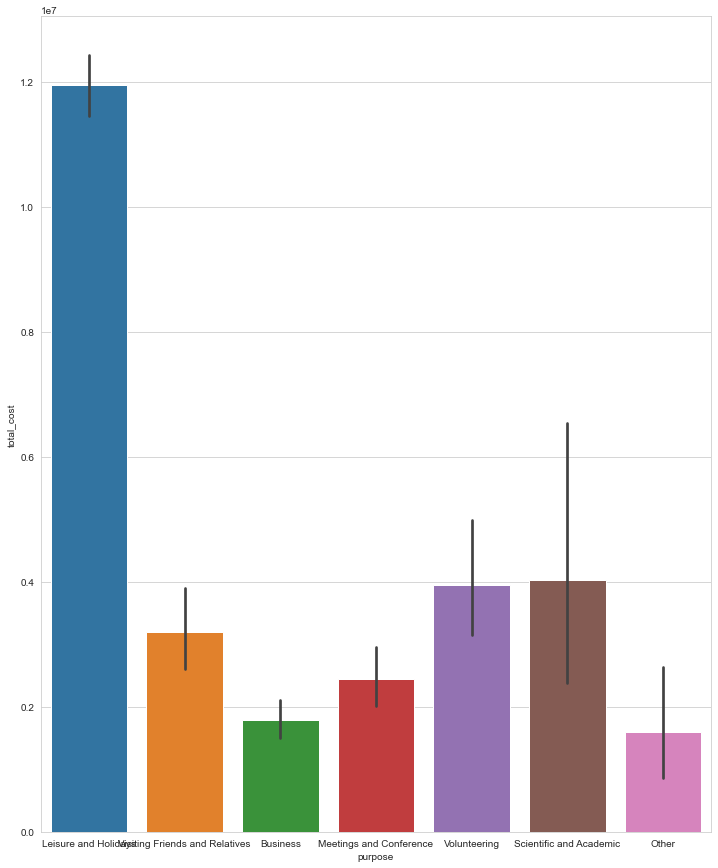

In [45]:
sns.barplot(x = 'purpose', y = 'total_cost', data = df)
plt.rcParams['figure.figsize'] = [15,15]
plt.show()

In [27]:
df.groupby('info_source')['ID'].count()

info_source
Friends, relatives                1635
Newspaper, magazines,brochures     359
Radio, TV, Web                     249
Tanzania Mission Abroad             68
Trade fair                          77
Travel, agent, tour operator      1913
inflight magazines                  18
others                             490
Name: ID, dtype: int64

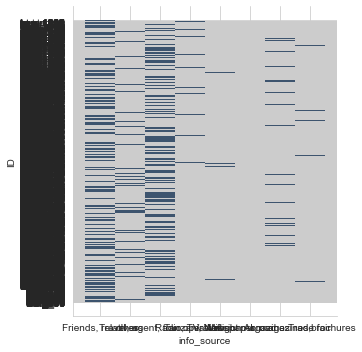

In [37]:
sns.displot(x = 'info_source', y= 'ID', data = df)
plt.show()

In [ ]:
#Much money are spent on leisure and holidays.

In [56]:
source = df.groupby('info_source')['total_cost'].sum()
source.idxmax()

'Travel, agent, tour operator'

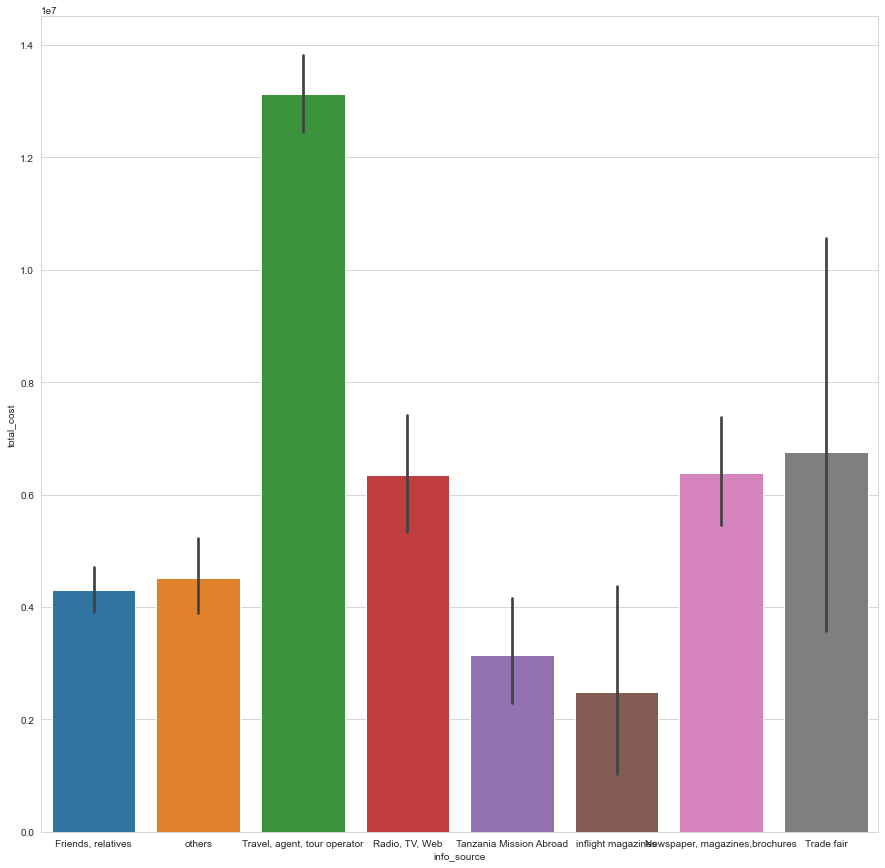

In [57]:
sns.barplot(x = 'info_source', y = 'total_cost', data = df)
plt.rcParams['figure.figsize'] = [15,15]
plt.show()

In [58]:
# Travel agent and tour operator source is more espensive than other sources, while inflight madazines newspaper is the cheapest

In [76]:
country = df.groupby('country')['total_cost'].sum()
country.idxmax()

'UNITED STATES OF AMERICA'

In [80]:
#tourist from united State of America spent more than tourists from other countries

In [75]:
df['main_activity'].unique()

array(['Wildlife tourism', 'Cultural tourism', 'Mountain climbing',
       'Beach tourism', 'Conference tourism', 'Hunting tourism',
       'Bird watching', 'business', 'Diving and Sport Fishing'],
      dtype=object)

In [83]:
activity = df.groupby('main_activity')['total_cost'].sum()
activity.idxmax()

'Wildlife tourism'

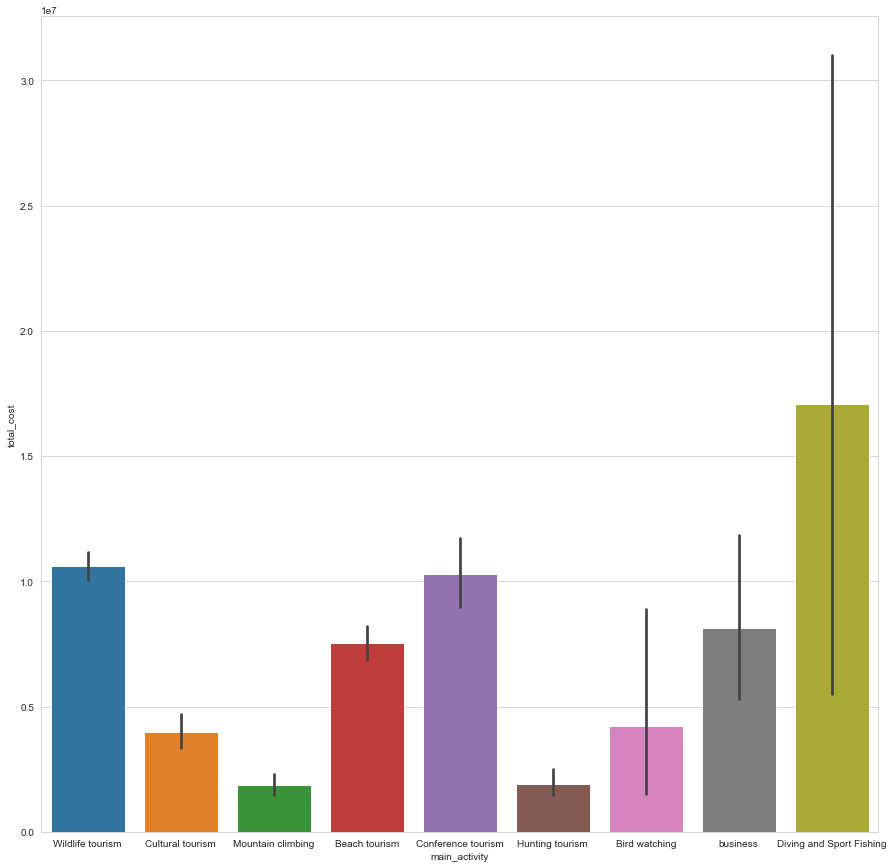

In [84]:
sns.barplot(x = 'main_activity', y = 'total_cost', data = df)
plt.rcParams['figure.figsize'] = [10,15]
plt.show()

In [17]:
for age in df['age_group'].unique():
    a = df[df['age_group'] == age].groupby('main_activity')['total_cost'].sum().idxmax()
    b = df[df['age_group'] == age].groupby('main_activity')['total_cost'].sum().idxmin()
    print(f'tourists of {age} age group, spent more on {a}')
    print(f'tourists of {age} age group, spent less on {b}\n')

tourists of 45-64 age group, spent more on Wildlife tourism
tourists of 45-64 age group, spent less on Diving and Sport Fishing

tourists of 25-44 age group, spent more on Wildlife tourism
tourists of 25-44 age group, spent less on Bird watching

tourists of 1-24 age group, spent more on Wildlife tourism
tourists of 1-24 age group, spent less on Mountain climbing

tourists of 65+ age group, spent more on Wildlife tourism
tourists of 65+ age group, spent less on Mountain climbing



In [ ]:
From the analysis, it was gathered that tourists within the age of 25-44 travel more to Tanzania, while,
those within age range of 65 and above spent more on tourism, followed by tourists within 
the age range of 45-64. more money were spent on holiday and leisure, and the main activity that much money spent on  was Wildlife tourism.
It was also deduced that highest number of tourists from united state of America spent more. From the data it was deduced that 
Travel agent, tour operator that was the highest number of source info and in the same line it was the source with highest cost.